In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import analyses as mm
from common import viz

In [2]:
W = 1500
H = 1000
w = 150
h = 200

def Gaussian(a0, b0, sa, sb, theta):
    from math import sqrt, cos, sin, pi
    
    x = w * ((np.arange(W) + 0.5) / W - 0.5) - a0
    y = h * ((np.arange(H) + 0.5) / H - 0.5) - b0
    
    c = cos(theta * pi / 180)
    s = sin(theta * pi / 180)
    
    A = ((c * c) / (sa * sa) + (s * s) / (sb * sb)) * (x * x)
    B = ((c * s) / (sa * sa) - (c * s) / (sb * sb)) * (x[:,np.newaxis] * y[np.newaxis:])
    C = ((s * s) / (sa * sa) + (c * c) / (sb * sb)) * (y * y)

    return np.exp(- 0.5 * (A[:,np.newaxis] + 2 * B + C[np.newaxis,:])) / (2 * pi * sa * sb)

In [3]:
a0, b0 = 3,  6
sx, sy = 15, 10
theta  = 110

G = Gaussian(a0, b0, sx, sy, theta)

F, A0, B0, SX, SY, THETA = mm.moments(G, w, h)
F *= abs(w * h / G.size)

print('Moments:')
print(f'{F :.6g}, {A0:.6g}, {B0:.6g}')
print(f'{SX:.6g}, {SY:.6g}, {THETA:.6g}')

print('Difference:')
print(f'{abs(F  - 1 ):.6g}, {abs(A0 - a0):.6g}, {abs(B0 - b0):.6g}')
print(f'{abs(SX - sx):.6g}, {abs(SY - sy):.6g}, {abs(THETA - theta):.6g}')

Moments:
1, 3, 6
15, 10, 110
Difference:
5.46748e-11, 2.02209e-10, 4.14854e-09
1.46419e-08, 2.14084e-09, 1.90169e-08


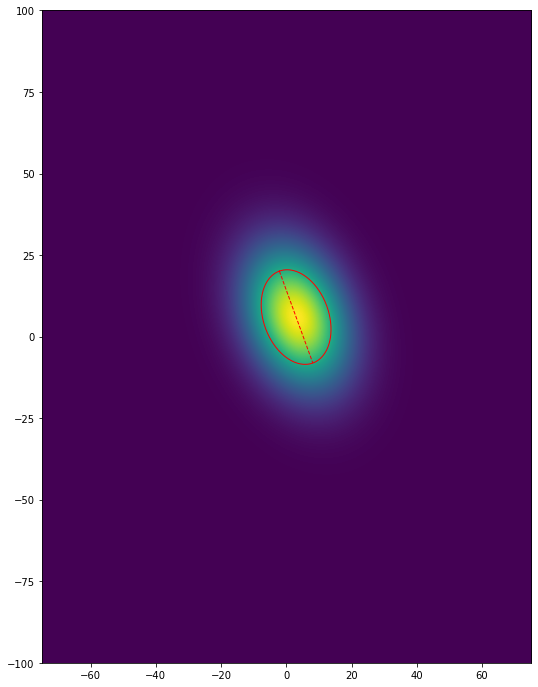

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
plt.imshow(G.T, origin='lower', extent=[-w/2,w/2,-h/2,h/2])
viz.ellipse(plt, a0, b0, sx, sy, theta, color='r')